<img src="ost-logo.png" width="240" align="right"/>
<div style="text-align: left"> <b> Deep Reinforcement Learning Projekt</b> <br>Rico Good <br> Erich Meyer <br>
19.06.2021
</div>

# Part B - Classic RL with continuous state space

In [1]:
import sys

sys.path.append("/home/eldr0n/anaconda3/envs/rl2/lib/python3.6/site-packages")

import numpy as np
import gym
import matplotlib
import matplotlib.pyplot as plt
import random

In [2]:
env = gym.make("CartPole-v1")

# Observation:
#         Type: Box(4)
#         Num     Observation               Min                     Max
#         0       Cart Position             -4.8                    4.8
#         1       Cart Velocity             -Inf                    Inf
#         2       Pole Angle                -0.418 rad (-24 deg)    0.418 rad (24 deg)
#         3       Pole Angular Velocity     -Inf                    Inf
#     Actions:
#         Type: Discrete(2)
#         Num   Action
#         0     Push cart to the left
#         1     Push cart to the right
#         Note: The amount the velocity that is reduced or increased is not
#         fixed; it depends on the angle the pole is pointing. This is because
#         the center of gravity of the pole increases the amount of energy needed
#         to move the cart underneath it
#     Reward:
#         Reward is 1 for every step taken, including the termination step

## Q-Learning epsilon greedy

In [3]:
alpha = 0.1
gamma = 0.95
epsilon = 1
epsilon_min = 0.05
epsilon_decay = 0.99995

Observation = [30, 30, 50, 50]
np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1])

Q_values = np.random.uniform(low=0,
                             high=1,
                             size=(Observation + [env.action_space.n]))
max_episodes = 30000
total_reward = 0
rewards = []

def get_discrete_state(state):
    discrete_state = state / np_array_win_size + np.array([15, 10, 1, 10])
    return tuple(discrete_state.astype(np.int))

def get_epsilon_greedy_action(state):
    if random.random() <= epsilon:
        return np.random.randint(0, env.action_space.n)  
    else:
        return np.argmax(Q_values[state])

def update_Q(state, state2, action):
    qMax = np.max(Q_values[state2])
    qsa = Q_values[state + (action,)]
    rpe = r + gamma * qMax - qsa
    Q_values[state + (action,)] += rpe * alpha

for episode in range(max_episodes):
    state = get_discrete_state(env.reset())
    done = False
    reward = 0
    
    while (not done):
        action = get_epsilon_greedy_action(state)
        new_state, r, done, _ = env.step(action)
        reward += r
        state2 = get_discrete_state(new_state)

        # if episode % 2000 == 0:
        #     env.render()

        update_Q(state, state2, action)
        state = state2
        epsilon *= epsilon_decay
      
    if epsilon < epsilon_min:
        epsilon = epsilon_min
        
    rewards.append(reward)
    total_reward += reward

    # print("episode {} finished with reward {}".format(episode, reward))
    if episode >= 100:
        if np.sum(rewards[-100:]) / 100 >= 195:
            print("episode {} finished".format(episode))
            done = True
            break

env.close()

if done:
    print("total reward: {}".format(total_reward))
    print("mean: {}".format(total_reward / max_episodes))


<ipython-input-3-1e96bcd25202>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))
episode 19259 finished
total reward: 1728419.0
mean: 57.61396666666667


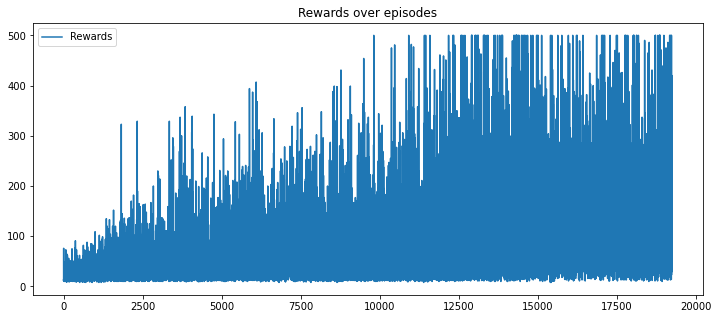

In [4]:
plt.figure(figsize=(12, 5))
plt.plot(rewards, label="Rewards")
plt.title("Rewards over episodes")
plt.legend()

## SARSA epsilon greedy

In [5]:
alpha = 0.1
gamma = 0.95
epsilon = 0.5
epsilon_min = 0.05
epsilon_decay = 0.99995

Observation = [30, 30, 50, 50]
np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1])

Q_values = np.random.uniform(low=0,
                             high=1,
                             size=(Observation + [env.action_space.n]))
max_episodes = 30000
total_reward = 0
rewards = []

def get_discrete_state(state):
    discrete_state = state / np_array_win_size + np.array([15, 10, 1, 10])
    return tuple(discrete_state.astype(np.int))

def get_epsilon_greedy_action(state):
    if random.random() <= epsilon:
        return np.random.randint(0, env.action_space.n)  
    else:
        return np.argmax(Q_values[state])

def update_Q(state, action, reward, state2, action2):
    predict = Q_values[state + (action, )]
    target = reward + gamma * Q_values[state2 + (action2, )]
    Q_values[state +
             (action, )] = Q_values[state +
                                    (action, )] + alpha * (target - predict)

for episode in range(max_episodes): 
    state = get_discrete_state(env.reset())
    done = False
    reward = 0
    action = get_epsilon_greedy_action(state)

    while (not done): 
        new_state, r, done, _ = env.step(action)
        state2 = get_discrete_state(new_state)
        action2 = get_epsilon_greedy_action(state2)

        # if episode % 2000 == 0:
        #     env.render()

        update_Q(state, action, r, state2, action2)

        reward += r
        state = state2
        action = action2
        epsilon *= epsilon_decay

    if epsilon < epsilon_min:
        epsilon = epsilon_min

    rewards.append(reward)
    total_reward += reward
    # print("episode {} finished with reward {}".format(episode, reward))
    
    if episode >= 100:
        if np.sum(rewards[-100:]) / 100 >= 195:
            print("episode {} finished".format(episode))
            done = True
            break

env.close()

if done:
    print("total reward: {}".format(total_reward))
    print("mean: {}".format(total_reward / max_episodes))


<ipython-input-5-1051ca92f35b>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))
episode 23437 finished
total reward: 1877108.0
mean: 62.57026666666667


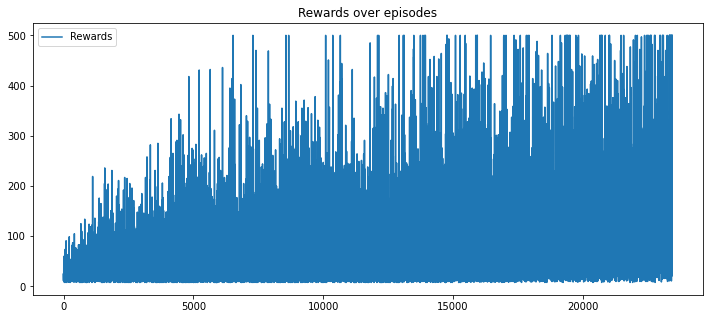

In [6]:
plt.figure(figsize=(12, 5))
plt.plot(rewards, label="Rewards")
plt.title("Rewards over episodes")
plt.legend()